# EDA (Exploratory Data Analysis)

Exploratory Data Analysis refers to the process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

### Import Libraries

Let's import some libraries to get started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline       #Magic function to visualize the graphs generated in jupyter notebook

import warnings
warnings.filterwarnings('ignore')

### Reading the data

start reading titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()   #to display first 5 entries

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()   #to display last 5 entries

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.shape     #to check size of the dataset(no of rows, no of columns)

(891, 12)

### Information about the data types,columns, null value counts, memory usage etc

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Missing Data

In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

In [8]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#train.describe().T        # creating the trsnspose of the description of the Dataframe and then showing it

### Check unique values in perticular column

In [12]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [13]:
train['Pclass'].nunique()  #Number of unique values

3

### Check Distribution across perticular column - Countplots

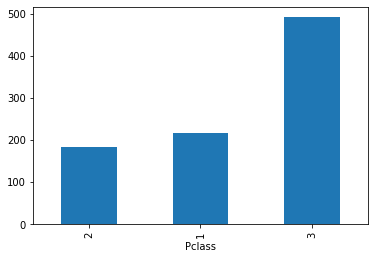

In [14]:
train.groupby(['Pclass'])['Pclass'].count().sort_values().plot.bar()

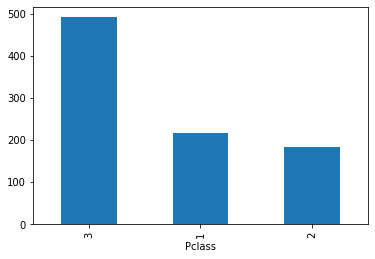

In [15]:
train.groupby(['Pclass'])['Pclass'].count().sort_values(ascending=False).plot.bar()

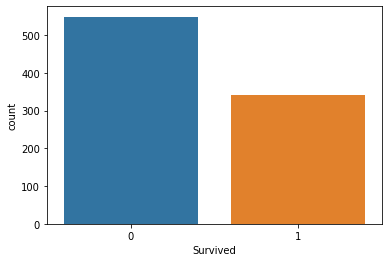

In [16]:
sns.countplot('Survived',data=train)
plt.show()

In [17]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

It is clear that 233 female survived out of 344. And out of 577 male 109 survived. The survival ratio of female is much greater than that of male. It can be seen clearly in following graph

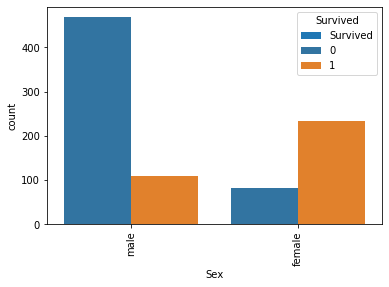

In [18]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot('Sex',hue='Survived',data=train,)
plt.show()

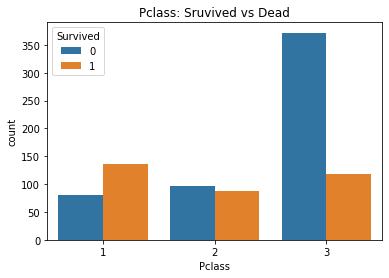

In [19]:
sns.countplot('Pclass', hue='Survived', data=train)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

it is clearly seen that pasangers of Class 1 are given high priority while Rescue. There are greater number of passangers in Class 3 than Class 1 and Class 2 but very few, almost 25% in Class 3 survived. In Class 2, survivail and non-survival rate is 49% and 51% approx. While in Class 1 almost 68% people survived. 

### agewise distribution of the passenger aboard the Titanic

Text(0.5, 1.0, 'Agewise distribution of the passenger aboard the Titanic')

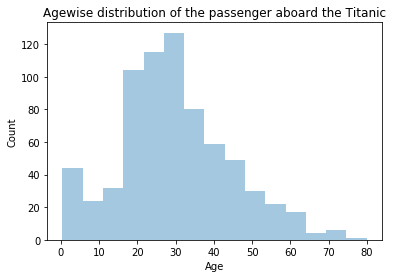

In [20]:
sns.distplot(train['Age'].dropna(), bins=15, kde=False)     ###kde = True
plt.ylabel('Count')
plt.title('Agewise distribution of the passenger aboard the Titanic')

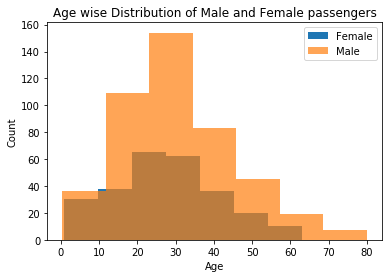

In [21]:
#Age wise Distribution of Male and Female passengers
plt.hist(train['Age'][(train['Sex'] == 'female')].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(train['Age'][(train['Sex'] == 'male')].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female passengers')
plt.legend()

### Plots

Text(0.5, 1.0, 'Scatterplot of passengers w.r.t Fare and Age')

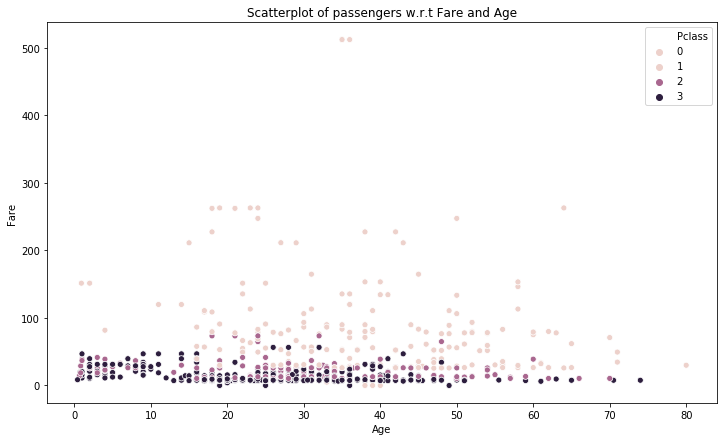

In [22]:
plt.figure(figsize=(12, 7))
sns.scatterplot('Age', 'Fare', data=train, hue="Pclass")
plt.title('Scatterplot of passengers w.r.t Fare and Age')

### Box Plot

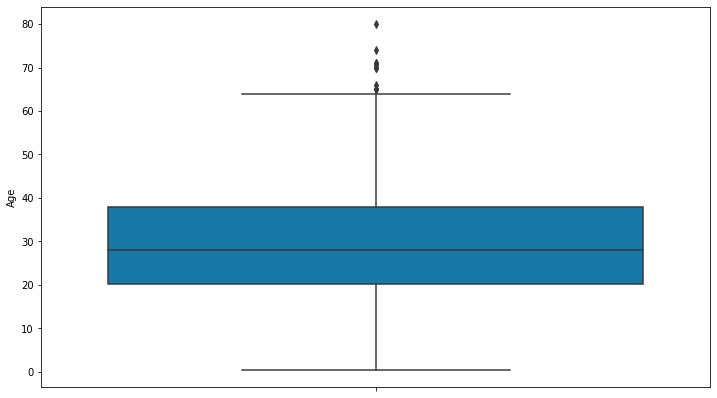

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(y='Age',data=train,palette='winter')

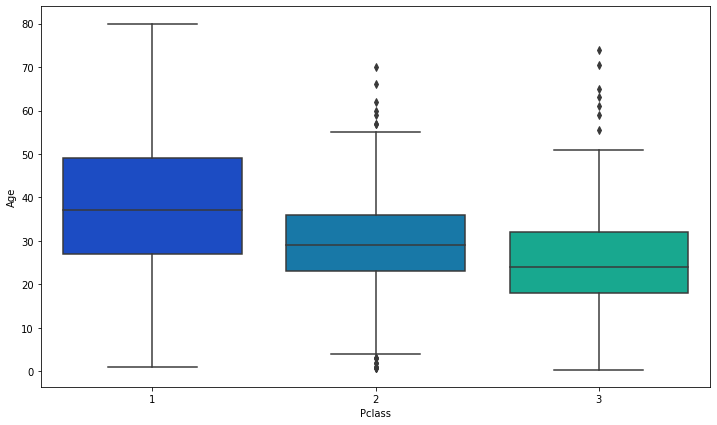

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

### Distribution plot - Histogram

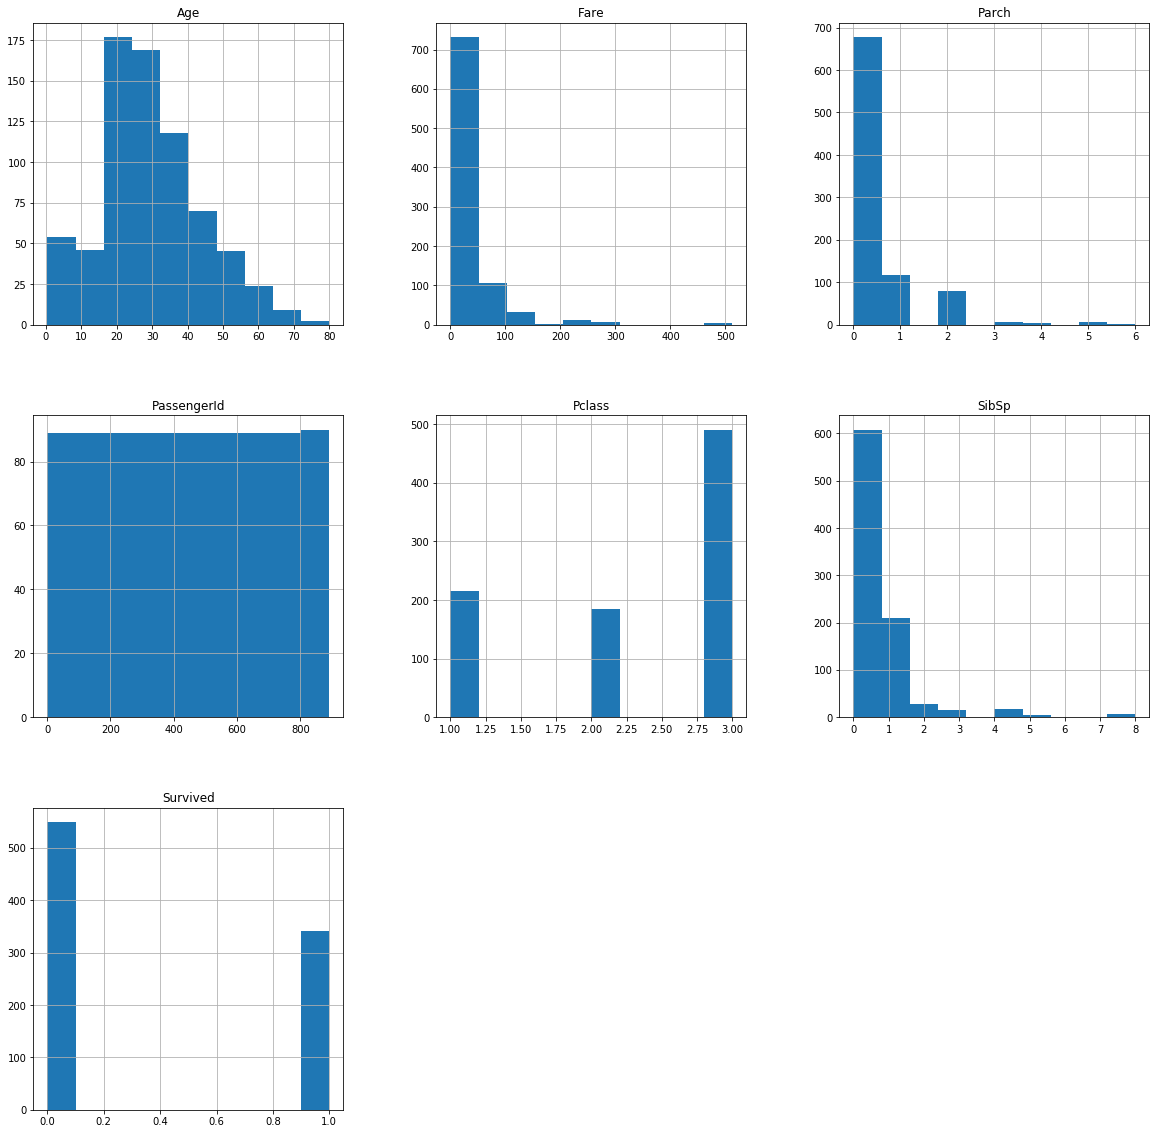

In [70]:
P = train.hist(figsize = (20,20))

### Pairplot

Subplot grid for more flexible plotting of pairwise relationships.

###### The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

For Reference: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

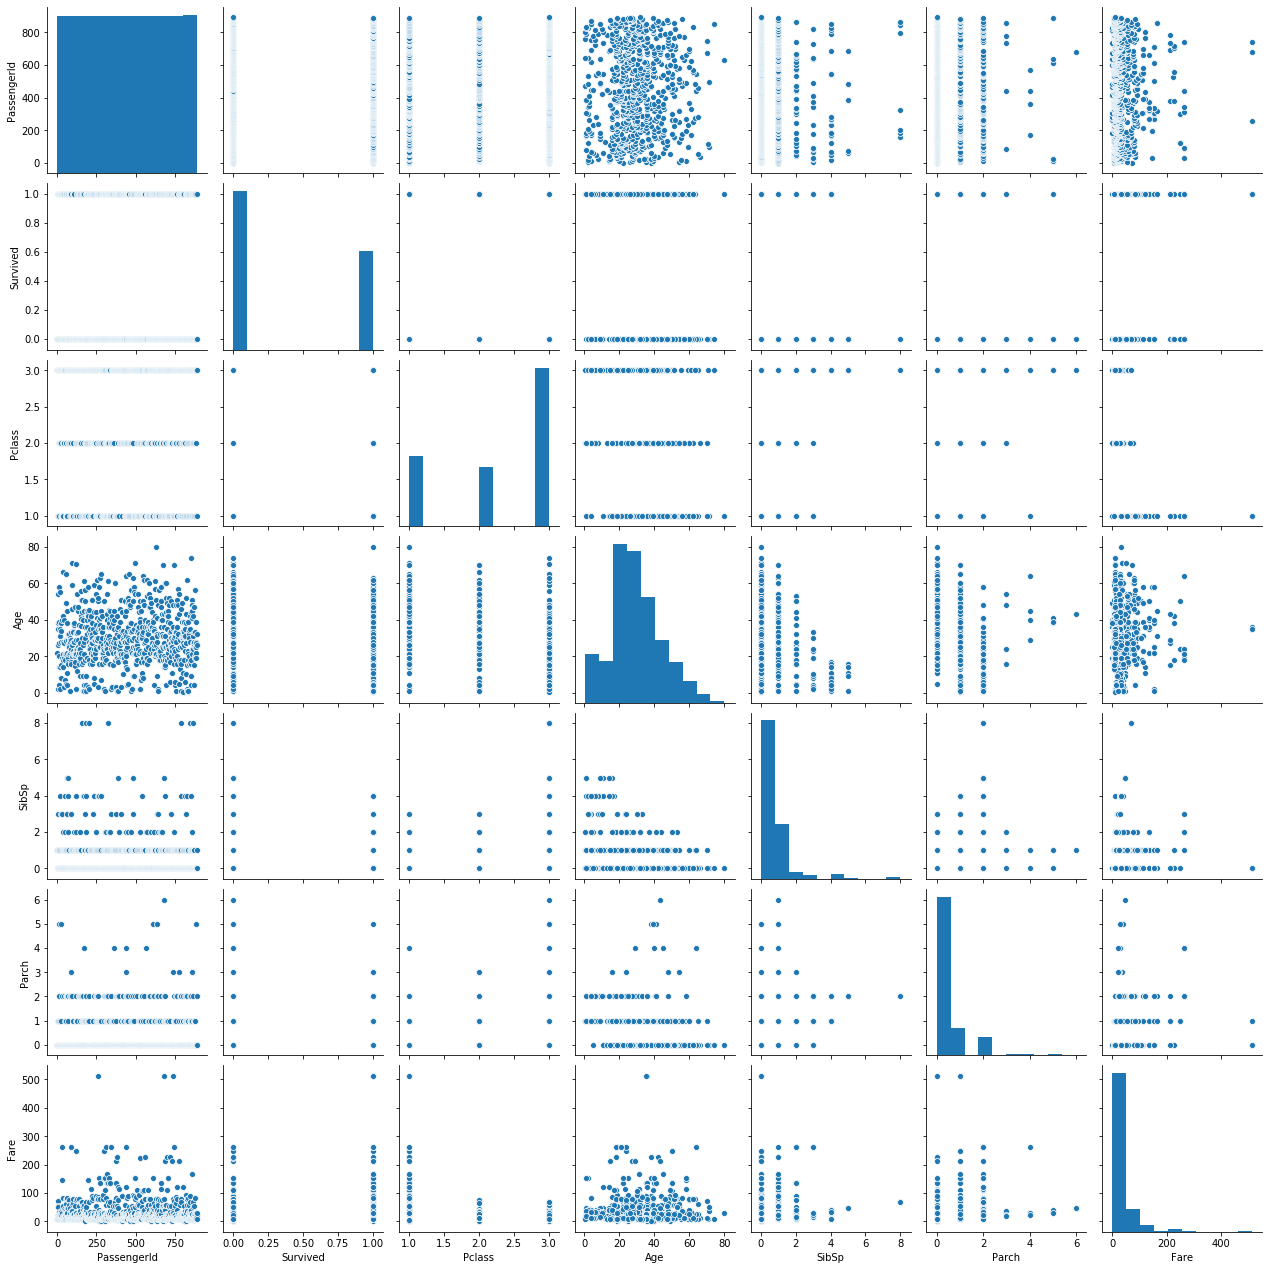

In [58]:
sns.pairplot(train)

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

# Heatmap 

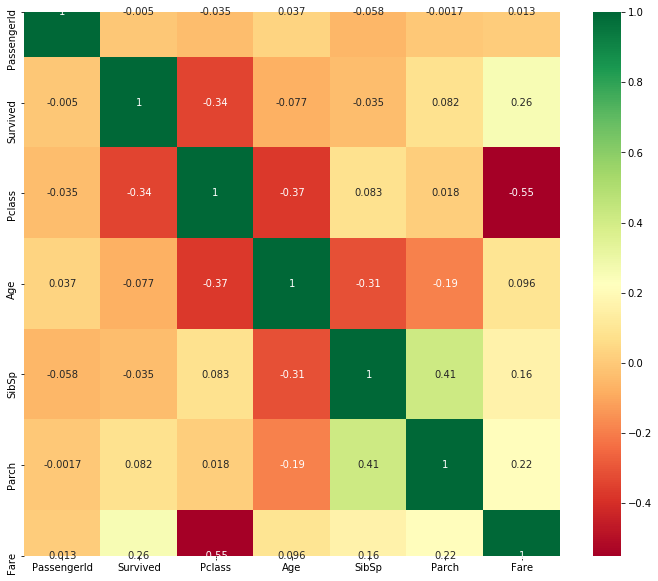

In [73]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(train.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

# Hypothesis Testing

In [41]:
def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = round(percent,2)
    return percent

In [40]:
!pip install ipy_table
import ipy_table as tbl

  Created wheel for ipy-table: filename=ipy_table-1.15.1-py3-none-any.whl size=18768 sha256=4e750df1b30759aff8eddfd01f35d77a98d65167c9133fbe3ee3e9f9e7ecd380
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\fb\81\d5\d4c54527f5ad92e9958d2cf736bd5401ad686fe3ac9cb7c0d5
Successfully built ipy-table


## Analysis of data

### Number of Survivors

Before trying to determine the characteristics of a passenger that would make them more likely to survive, the number of survivors in the sample should be compared to the actual number of survivors. Based on the information provided by the source of the dataset (Kaggle) there were 2224 passengers and 722 survivors.

In [42]:
# passengers and number of survivors based on Kaggle results
kaggle_passengers = 2224
kaggle_nonsurvivors = 1502
kaggle_survivors = kaggle_passengers - kaggle_nonsurvivors 

# Count number of passengers and number of survivors in sample data
sample_passengers = len(train)
sample_survivors = len(train[train.Survived==True])
sample_nonsurvivors = sample_passengers - sample_survivors


survivors_data = train[train.Survived==True]
non_survivors_data = train[train.Survived==False]

survivors = [
    ['Item','Kaggle (Count)','Kaggle (%)' ,'Sample Dataset (Count)', 'Sample Dataset (%)'],
    ['Total Passengers',kaggle_passengers,'-', sample_passengers,'-'],
    ['Survivors',
         kaggle_survivors,
         calculate_percentage(kaggle_survivors,kaggle_passengers, True), 
         sample_survivors,
         calculate_percentage(sample_survivors,sample_passengers, True) 
    ],
    ['Non-survivors', 
         kaggle_nonsurvivors,
         calculate_percentage(kaggle_nonsurvivors,kaggle_passengers, True), 
         sample_nonsurvivors,
         calculate_percentage(sample_nonsurvivors,sample_passengers, True) 
    ]
]
tbl.make_table(survivors)

Item,Kaggle (Count),Kaggle (%),Sample Dataset (Count),Sample Dataset (%)
Total Passengers,2224,-,891,-
Survivors,722,0.3200,342,0.3800
Non-survivors,1502,0.6800,549,0.6200


When comparing the number of survivors from the sample dataset to the actual number of survivors we can see that the percentage of survivors is realitively close to each other.

# Chi-square test

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

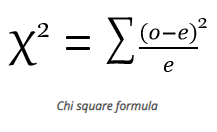

To calculate chi square, we take the square of the difference between the observed (o) and expected (e) values and divide it by the expected value. ... Depending on the number of categories of data, we may end up with two or more values. Chi square is the sum of those values.

### Which gender had a better chance of survival?

n order to answer this question we need to look at how many males and females were on board and which gender had the highest survival rate.

Hypothesis
The hypothesis for this question is that the gender does impact the chances of survival

H0 = Gender has no impact on survivability

HA = Gender does impact the chances of survivabily

### Count of Survivors by Gender

In [26]:
table = pd.crosstab(train['Survived'],train['Sex'])
table

Sex,female,male
Survived,,
0,81,468
1,233,109


### Proportion of survivors by Gender

In [28]:
train.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Text(0.5, 1.0, '% of survivors by gender')

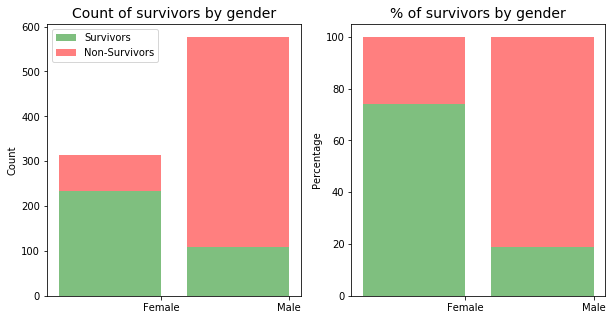

In [44]:
# calculate values for each survival status
survivors_gender = survivors_data.groupby(['Sex']).size().values
non_survivors_gender = non_survivors_data.groupby(['Sex']).size().values

# calculate totals for percentates
totals = survivors_gender + non_survivors_gender

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_gender, totals)*100 
data2_percentages = calculate_percentage(non_survivors_gender, totals)*100 

gender_categories = ['Female', 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4], gender_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4],  gender_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=14)

The plots and proportions above show that there were a significant more males on board the Titanic compared to the number of females. Whilst the second plot (% of survivors by gender) shows that Females had a higher proportion (74.2%) of survivors compared to the proportion of males (18.9%). This shows that females had a greater rate of survival.

As the P-Value is less than 0.05 the probability of that the age group will impact the chances of survival is high. Therefore I believe that we can reject the null hypothesis.

In [46]:
from scipy import stats

table = pd.crosstab([train['Survived']], train['Sex'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,260.7170
P-Value,0.0000


As the P-Value is less than 0.05 the probability of that the gender will impact the chances of survival is high. Therefore I believe that we can reject the null hypothesis. I also believe that the plots above confirm this result.

## Which social class had a better chance of survival?

### Hypothesis

The hypothesis for this question is that the social class does impact the chances of survival

H0 = Social Class has no impact on survivability

HA = Social Class does impact the chances of survivabily

### Count of survivors by class

In [47]:

table = pd.crosstab(train['Survived'],train['Pclass'])
table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


### Proportion of survivors by class

In [49]:
train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Text(0.5, 1.0, '% of survivors by class')

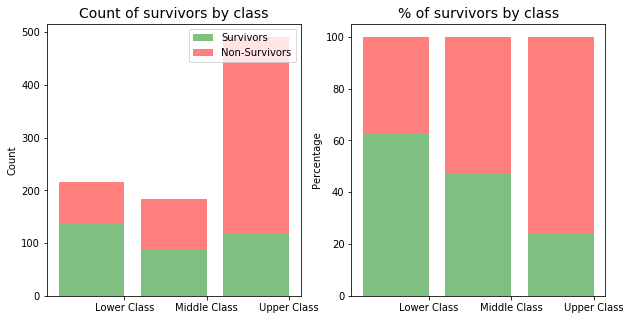

In [50]:
# calculate values for each survival status
survivors_class = survivors_data.groupby(['Pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['Pclass']).size().values

# calculate totals for percentates
totals = survivors_class + non_survivors_class

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_class, totals)*100 
data2_percentages = calculate_percentage(non_survivors_class, totals)*100 


class_categories = ['Lower Class', 'Middle Class', 'Upper Class']


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4, 2.4], class_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by class",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by class",fontsize=14)

The graphs above so that whilst the lower class had more passengers, than all classes, and more survivors than the middle class, the lower class had the lowest survival rate. The Upper Class passengers had the highest survival rate

### Hypothesis Test

For this test I will be using the chi-sqaure test for independence

In [55]:

table = pd.crosstab([train['Survived']], train['Pclass'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,102.8890
P-Value,0.0000



As the P-Value is less than 0.05 the probability of that the social class will impact the chances of survival is high. Therefore I believe that we can reject the null hypothesis. I also believe that the plots above confirm this result.